# 29th Sept

In [1]:
import tweepy
import pandas as pd
import numpy as np
import re
import seaborn as sns
import matplotlib.pyplot as plt
from textblob import TextBlob
from tweepy.auth import OAuthHandler
import csv

In [2]:
path = r'/home/edmundotome/Documents/Github Projects/LogAPItwitter.csv'
log = pd.read_csv(path)

In [3]:
consumerKey = log['API Key'][0]
consumerSecret = log['API Key Secret'][0]

accessToken = log['Access Token'][0]
accessTokenSecret = log['Access Token Secret'][0]

In [4]:
auth = OAuthHandler(consumerKey, consumerSecret)
auth.set_access_token(accessToken, accessTokenSecret)

api = tweepy.API(auth, wait_on_rate_limit=True)

In [5]:
#gather 1000 tweets about Bitcoin and filter out any retweets 'RT'
search_term = '#bitcoin -filter:retweets'

#create a cursor object
tweets = tweepy.Cursor(api.search, q=search_term, lang='en', since='2021-09-29', tweet_mode='extended').items(1000)

#store tweets in a variable and get the full text
all_tweets = [tweet.full_text for tweet in tweets]

In [6]:
#create a dataframe to store the tweets with a column called 'tweets'
df = pd.DataFrame(all_tweets, columns=['Tweets'])
#show the first 5 rows of data
df.head(10)

,Tweets
0,See you later!!! #ADA #XRP #CARDANO #BITCOIN #...
1,👋 A new block was found on the #Bitcoin networ...
2,"฿ value over 1 year: +402.35%, (+$34280) [Curr..."
3,Application-based public blockchain: \n$eth\n$...
4,So far this #Bitcoin dip tweet is raging well....
5,@Axion_TheFuture #Axion is rarest! Having #Bit...
6,Colin563 found #bitcoin in a User vault at thi...
7,#love #bitcoin #tumblr #twitter #facebook #ins...
8,@AltcoinDailyio #bitcoin walked so that #altco...
9,USE CODE CRYPTOEVENTS25 TO GET 25% OFF YOUR TI...


In [7]:
#create a function to clean the tweets 
def cleanTwt(twt):
  twt = re.sub('#bitcoin', 'bitcoin', twt) #removes the '#' from bitcoin
  twt = re.sub('#Bitcoin', 'Bitcoin', twt)
  twt = re.sub('#BTC', 'Bitcoin', twt)
  twt = re.sub('#[A-Za-z0-9]+', '', twt) #removes any strings with a '#'
  twt = re.sub('\\n', '', twt) #removes the '\n' string
  twt = re.sub('https?:\/\/\S+', '', twt) #removes any hyperlinks
  return twt

In [8]:
#clean the tweets
df['Cleaned Tweets'] = df['Tweets'].apply(cleanTwt)
#show the dataset
df.head()

,Tweets,Cleaned Tweets
0,See you later!!! #ADA #XRP #CARDANO #BITCOIN #...,See you later!!! Bitcoin
1,👋 A new block was found on the #Bitcoin networ...,👋 A new block was found on the Bitcoin network...
2,"฿ value over 1 year: +402.35%, (+$34280) [Curr...","฿ value over 1 year: +402.35%, (+$34280) [Curr..."
3,Application-based public blockchain: \n$eth\n$...,Application-based public blockchain: $eth$bnb$...
4,So far this #Bitcoin dip tweet is raging well....,So far this Bitcoin dip tweet is raging well.....


In [9]:
#create a function to get subjetivity
def getSubjectivity(twt):
  return TextBlob(twt).sentiment.subjectivity
#create a function to get polarity
def getPolarity(twt):
  return TextBlob(twt).sentiment.polarity

#create two new columns called 'Subjetivity' and 'Polarity'
df['Subjetivity'] = df['Cleaned Tweets'].apply(getSubjectivity)

df['Polarity'] = df['Cleaned Tweets'].apply(getPolarity)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity
0,See you later!!! #ADA #XRP #CARDANO #BITCOIN #...,See you later!!! Bitcoin,0.000000,0.000000
1,👋 A new block was found on the #Bitcoin networ...,👋 A new block was found on the Bitcoin network...,0.284848,0.045455
2,"฿ value over 1 year: +402.35%, (+$34280) [Curr...","฿ value over 1 year: +402.35%, (+$34280) [Curr...",0.400000,0.000000
3,Application-based public blockchain: \n$eth\n$...,Application-based public blockchain: $eth$bnb$...,0.533333,0.300000
4,So far this #Bitcoin dip tweet is raging well....,So far this Bitcoin dip tweet is raging well.....,0.833333,0.441667
5,@Axion_TheFuture #Axion is rarest! Having #Bit...,@Axion_TheFuture is rarest! Having Bitcoin di...,0.250000,0.488281
6,Colin563 found #bitcoin in a User vault at thi...,Colin563 found bitcoin in a User vault at this...,1.000000,1.000000
7,#love #bitcoin #tumblr #twitter #facebook #ins...,bitcoin on orders over $99 at,0.000000,0.000000
8,@AltcoinDailyio #bitcoin walked so that #altco...,@AltcoinDailyio bitcoin walked so that can fl...,0.750000,0.414286
9,USE CODE CRYPTOEVENTS25 TO GET 25% OFF YOUR TI...,USE CODE CRYPTOEVENTS25 TO GET 25% OFF YOUR TI...,0.000000,0.000000


In [10]:
#create a function to get sentiment text 
def getSentiment(score):
  if score < 0:
    return 'Negative'
  elif score == 0:
    return 'Neutral'
  else:
    return 'Positive'


In [11]:
#create a column to store the text sentiment
df['Sentiment'] = df['Polarity'].apply(getSentiment)

df.head(15)

,Tweets,Cleaned Tweets,Subjetivity,Polarity,Sentiment
0,See you later!!! #ADA #XRP #CARDANO #BITCOIN #...,See you later!!! Bitcoin,0.000000,0.000000,Neutral
1,👋 A new block was found on the #Bitcoin networ...,👋 A new block was found on the Bitcoin network...,0.284848,0.045455,Positive
2,"฿ value over 1 year: +402.35%, (+$34280) [Curr...","฿ value over 1 year: +402.35%, (+$34280) [Curr...",0.400000,0.000000,Neutral
3,Application-based public blockchain: \n$eth\n$...,Application-based public blockchain: $eth$bnb$...,0.533333,0.300000,Positive
4,So far this #Bitcoin dip tweet is raging well....,So far this Bitcoin dip tweet is raging well.....,0.833333,0.441667,Positive
5,@Axion_TheFuture #Axion is rarest! Having #Bit...,@Axion_TheFuture is rarest! Having Bitcoin di...,0.250000,0.488281,Positive
6,Colin563 found #bitcoin in a User vault at thi...,Colin563 found bitcoin in a User vault at this...,1.000000,1.000000,Positive
7,#love #bitcoin #tumblr #twitter #facebook #ins...,bitcoin on orders over $99 at,0.000000,0.000000,Neutral
8,@AltcoinDailyio #bitcoin walked so that #altco...,@AltcoinDailyio bitcoin walked so that can fl...,0.750000,0.414286,Positive
9,USE CODE CRYPTOEVENTS25 TO GET 25% OFF YOUR TI...,USE CODE CRYPTOEVENTS25 TO GET 25% OFF YOUR TI...,0.000000,0.000000,Neutral


/home/edmundotome/anaconda3/envs/Signal-Processing/lib/python3.8/site-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


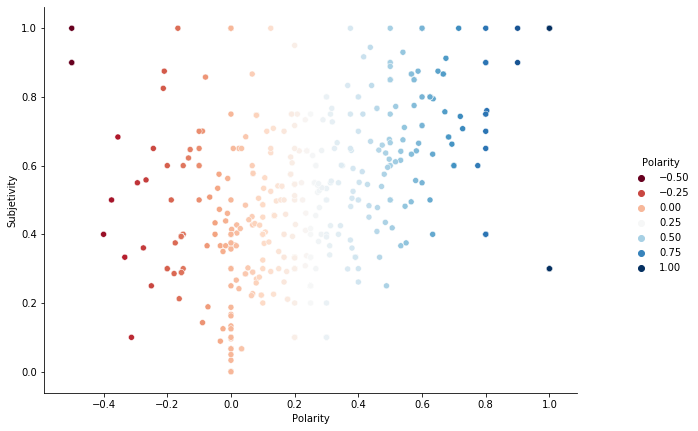

In [12]:
ax = sns.relplot(df['Polarity'], df['Subjetivity'], hue = df['Polarity'], palette='RdBu')
ax.fig.set_size_inches(10,6)

norm = plt.Normalize(df['Polarity'].min(), df['Polarity'].max())
sm = plt.cm.ScalarMappable(cmap="RdBu", norm=norm)
sm.set_array([])

plt.show()

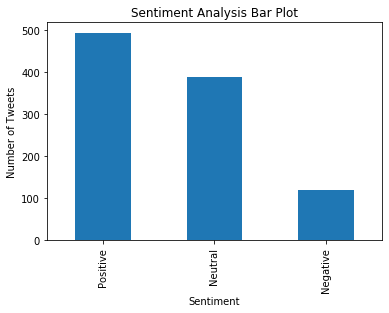

In [13]:
#create a barchar to show the count of positive, neutral and negative sentiments
df['Sentiment'].value_counts().plot(kind='bar')
plt.title('Sentiment Analysis Bar Plot')
plt.xlabel('Sentiment')
plt.ylabel('Number of Tweets')
plt.show()

In [14]:
df['Sentiment'].value_counts()

Positive    494
Neutral     388
Negative    118
Name: Sentiment, dtype: int64

In [15]:
val_count = list(df['Sentiment'].value_counts())
val_count

[494, 388, 118]

In [16]:
lst_df = list(df['Sentiment'].value_counts())
lst_df

[494, 388, 118]

In [17]:
dfs = pd.read_csv("r_sentiments.csv")
  
# updating the column value/data
dfs.loc[1, 'Sentiment'] = 'day 2'
dfs.loc[1, 'Positive'] = lst_df[0]
dfs.loc[1, 'Neutral'] = lst_df[1]
dfs.loc[1, 'Negative'] = lst_df[2]
  
# writing into the file
dfs.to_csv("r_sentiments.csv", index=False)
  
print(dfs)

  Sentiment  Positive  Neutral  Negative
0     day 1     494.0    372.0     134.0
1     day 2     494.0    388.0     118.0
